## Model spremnika topline

$G(s)=\frac{1}{k_g + Cs}$

In [1]:
# priprema okruženja
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from control import tf, step_response, forced_response, initial_response
import ipywidgets as ipw

In [2]:
# Prijenosna funkcija spremnika

def tf_opruga_prigusnica(m, k , c):
    return tf([1],[m, c, k])

In [3]:
# definicija prijenosne funkcije, s parametrima C i k_g

G1 = tf_opruga_prigusnica(m=1, k=3, c=1)

G1


     1
-----------
s^2 + s + 3

<IPython.core.display.Javascript object>


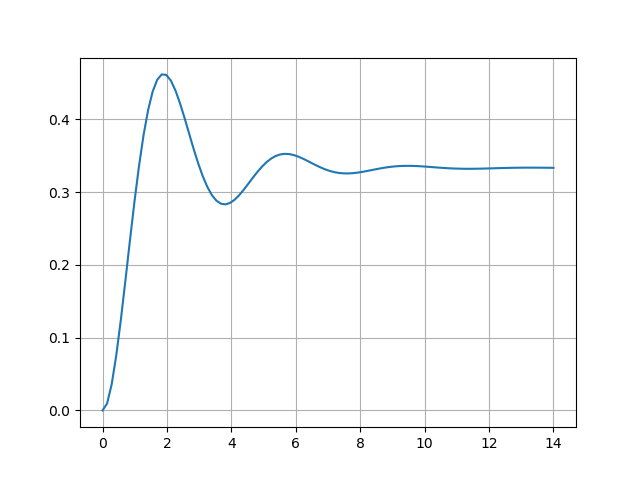

In [10]:
# slobodni odziv
t, y = step_response(G1)
plt.figure()
plt.plot(t,y)
plt.grid()

<IPython.core.display.Javascript object>


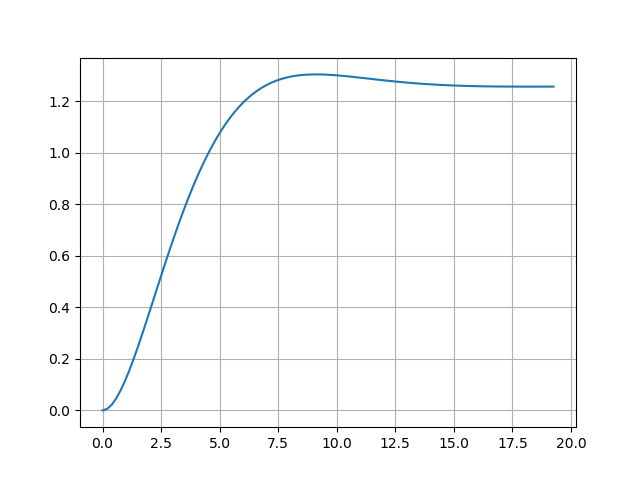

In [36]:
params = {
    'm': 1,
    'k': 1,
    'c': 1
}

def replot(change=None):
    if change and change.name=='value':
        params[change.owner.description] = change.new
    
    G1 = tf_opruga_prigusnica(**params)
    t,y = step_response(G1)    
    
    axes=fig.get_axes()[0]
    axes.clear()
    axes.plot(t, y)
    axes.grid()
    
sliders=[
    ipw.FloatLogSlider(description='m', value=params['m'], min=-1, max=2, step=0.1),
    ipw.FloatLogSlider(description='k', value=params['k'], min=-1, max=2, step=0.1),
    ipw.FloatSlider(description='c', value=params['c'], min=0, max=5, step=0.1)
]
[slider.observe(replot) for slider in sliders]

fig = plt.figure()
fig.set_label('Odziv sustava')
plt.grid()
#plt.legend('Položaj', 'Brzina')
plt.show()

replot()
ipw.VBox(sliders)